In [1]:
import sys
sys.path.append('../')
import torch
import yaml, os
import matplotlib.pyplot as plt
from forward_model import Surrogate
import argparse
from utils import visualize

device = torch.device('cuda:0')
plt.rcParams["font.family"] = "Times New Roman"

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
args = argparse.ArgumentParser().parse_args('')

project_dir = '../weights/case2_forward_params_a'
config = '../config/case2_forward_param_a.yaml'
model_dir = os.path.join(project_dir, 'best_train_loss_model.pt')



with open(config, 'r') as f:
    config = yaml.safe_load(f)
    for key, value in config.items():
        setattr(args, key, value)

epoch = 'Nah'
lr = 'Nah'
run = 'Nah'
batch_size = 'Nah'
regl_case = 'Nah'

setattr(args, 'eval_type', 'forward_eval')
setattr(args, 'epoch', epoch)
setattr(args, 'lr', lr)
setattr(args, 'run', run)
setattr(args, 'bs', batch_size)
setattr(args, 'regl_case', regl_case)
setattr(args, 'project_dir', project_dir)

evaluator = Surrogate(args)
evaluator.create_eval_dir()
evaluator.load_weights()

test_x, test_params, test_y, test_ts = evaluator.test_data
test_data_pred = evaluator.evaluate_y()

train_x, train_params, train_y, train_ts = evaluator.train_data
train_data_pred = evaluator.model(train_x, train_params, train_ts)

The model is set to be:  ParametricDeepONet
The decoder mode is:  nonlinear
The depth of the model is:  4
The width of the model is:  400
Normalizing the data mode is self_min_max...
Train data is normalized by the train data...
The shape of train dataset: source_signal, params_data, response_data, ts... torch.Size([600, 1, 200]) torch.Size([600, 3]) torch.Size([600, 4, 200]) torch.Size([600, 200])
Test data is normalized by the test data...
Normalizing the data mode is self_min_max...
The shape of test dataset: source_signal, params_data, response_data, ts... torch.Size([600, 1, 200]) torch.Size([600, 3]) torch.Size([600, 4, 200]) torch.Size([600, 200])
Test data is normalized by the test data...
Normalizing the data mode is self_min_max...
The shape of test dataset: source_signal, params_data, response_data, ts... torch.Size([400, 1, 200]) torch.Size([400, 3]) torch.Size([400, 4, 200]) torch.Size([400, 200])
Seed is randomly set to be:  9936


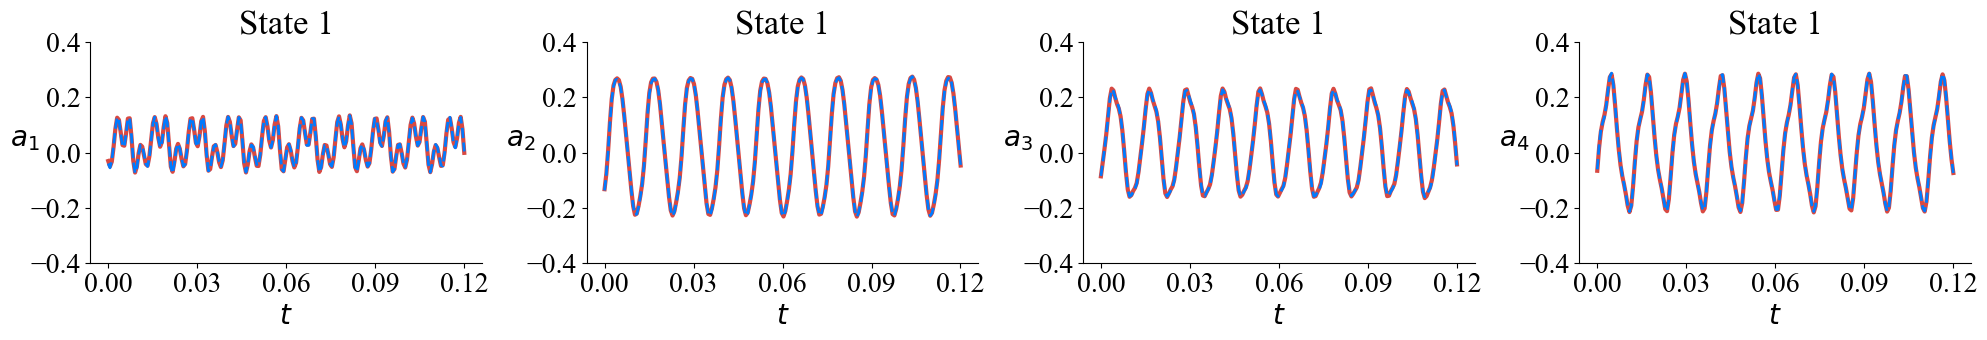

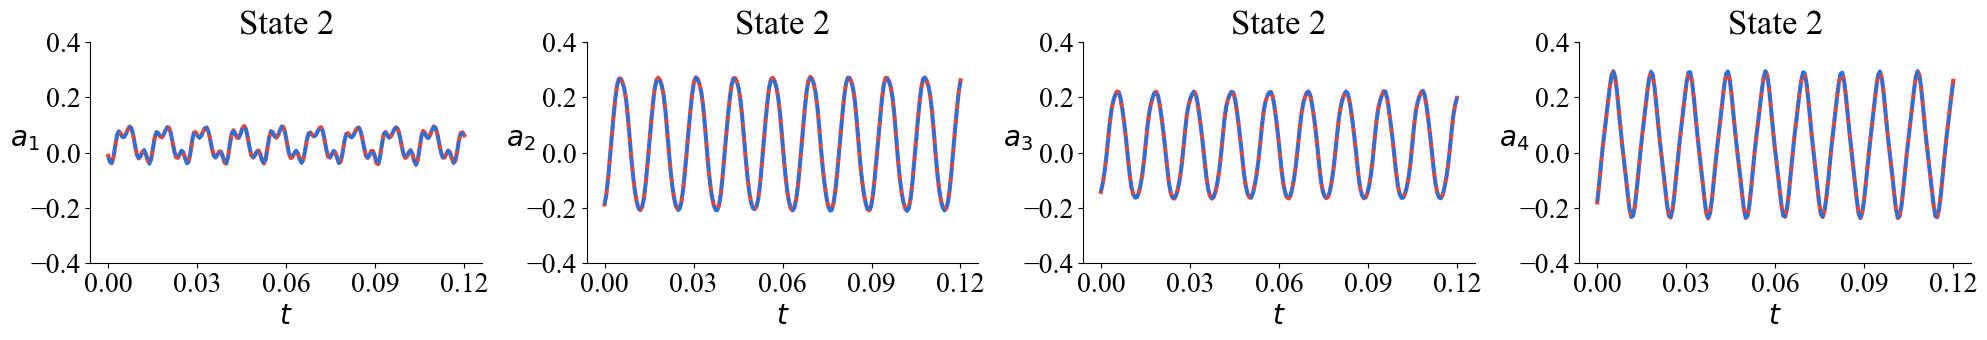

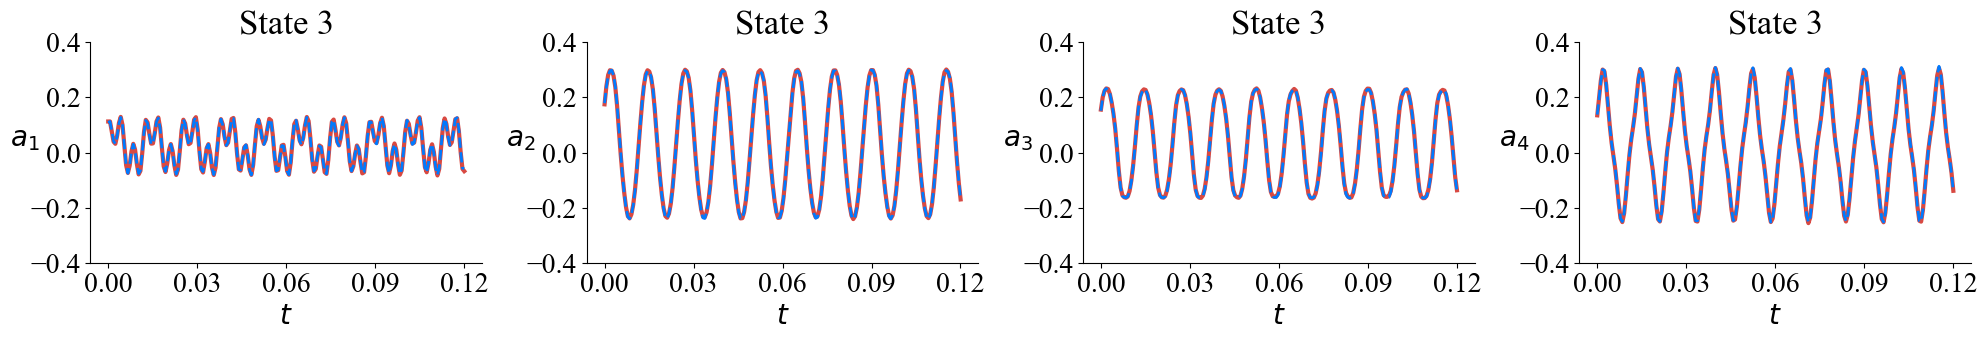

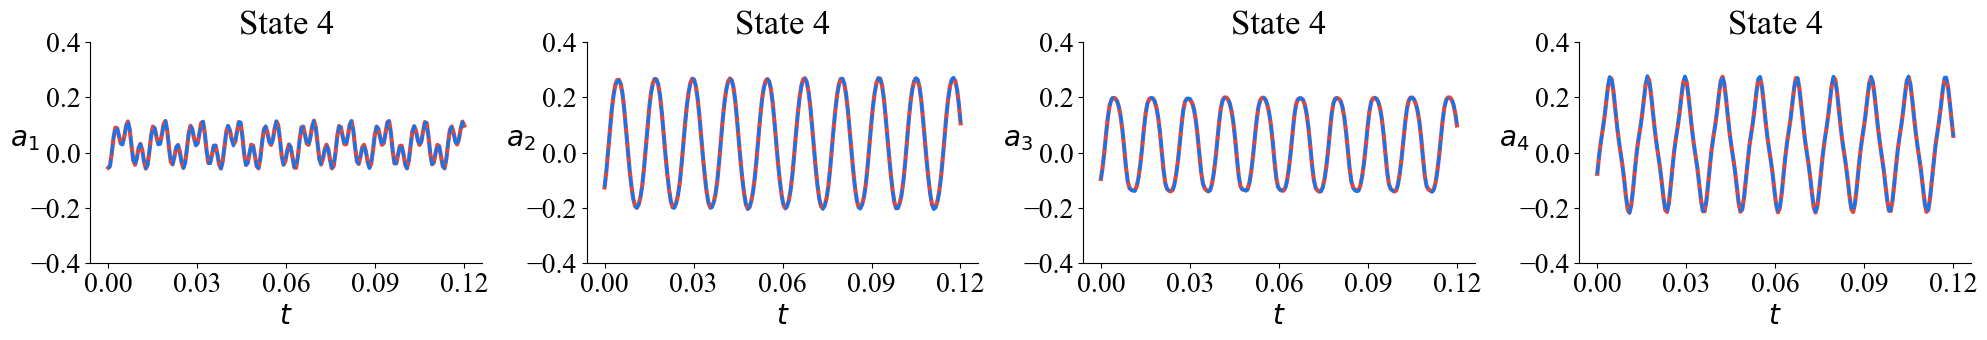

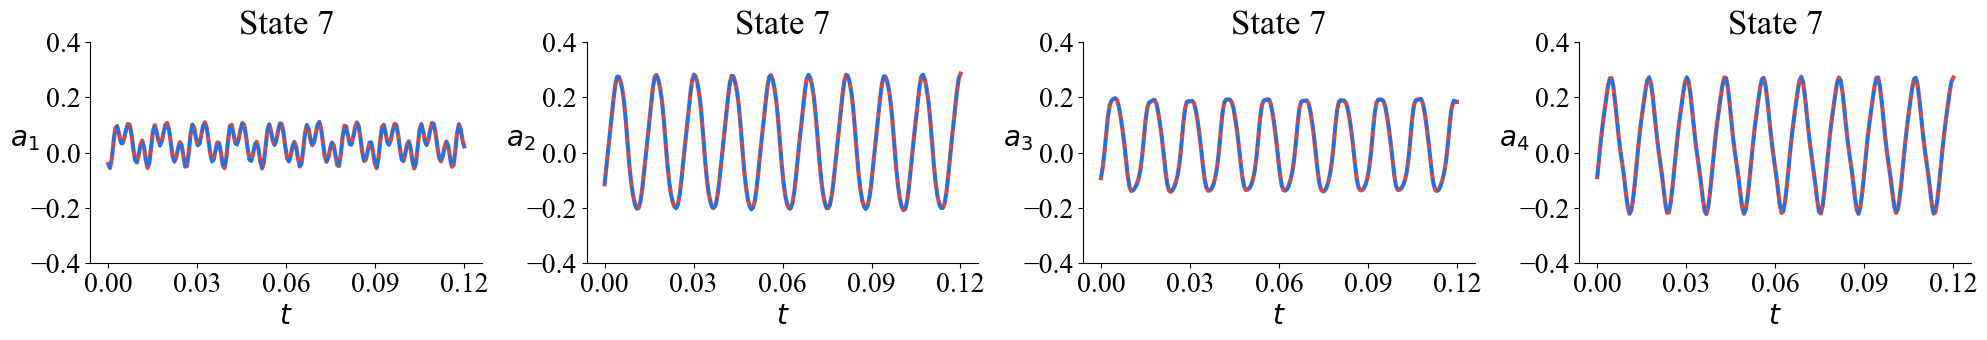

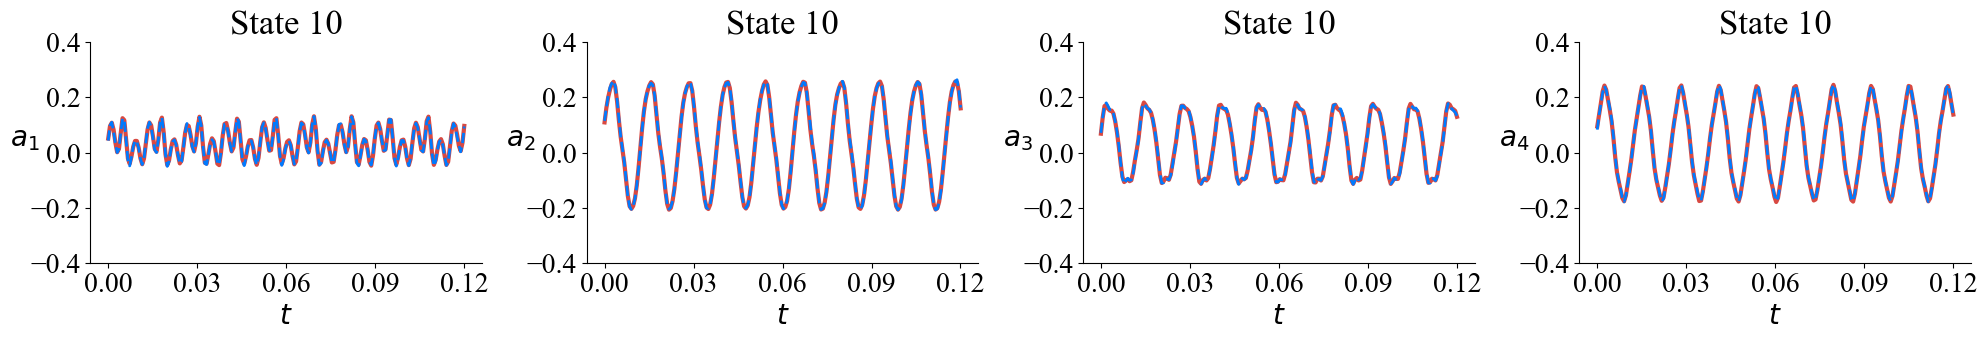

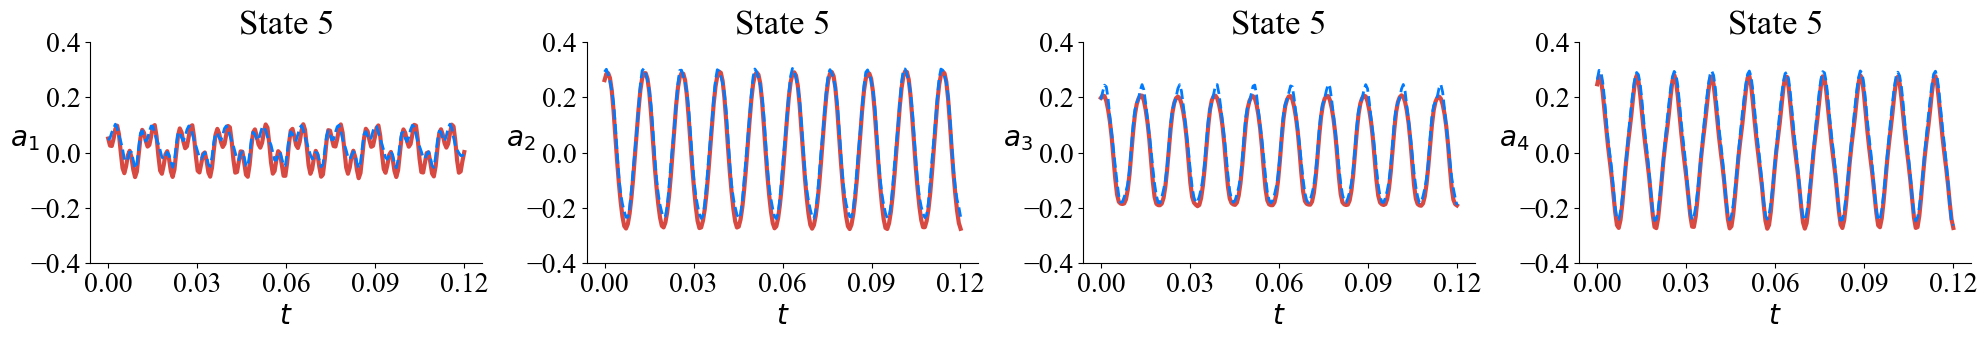

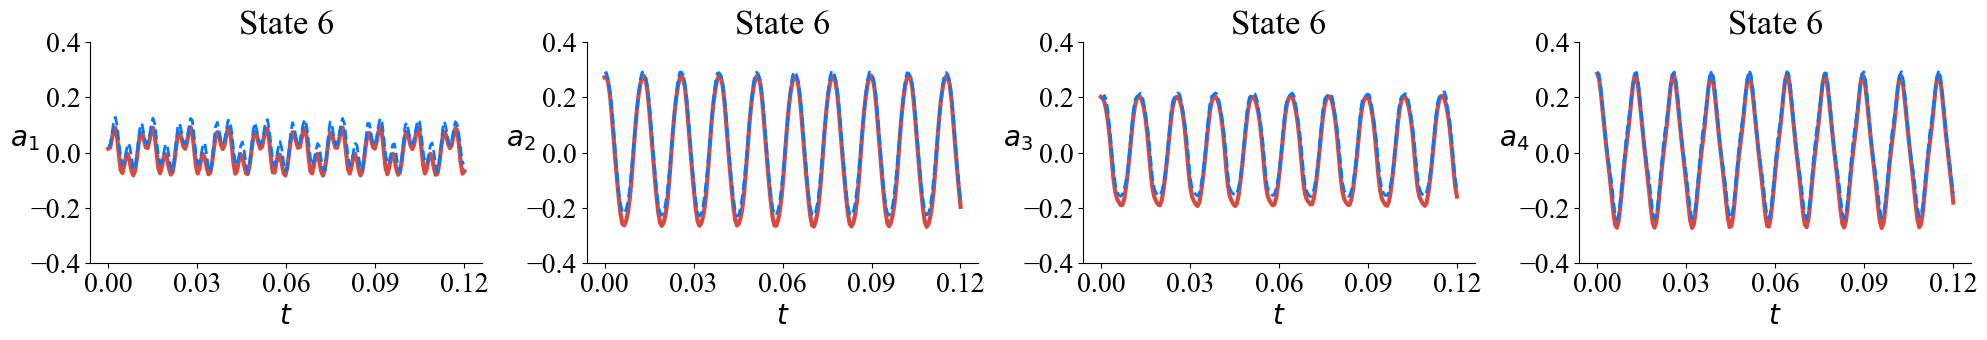

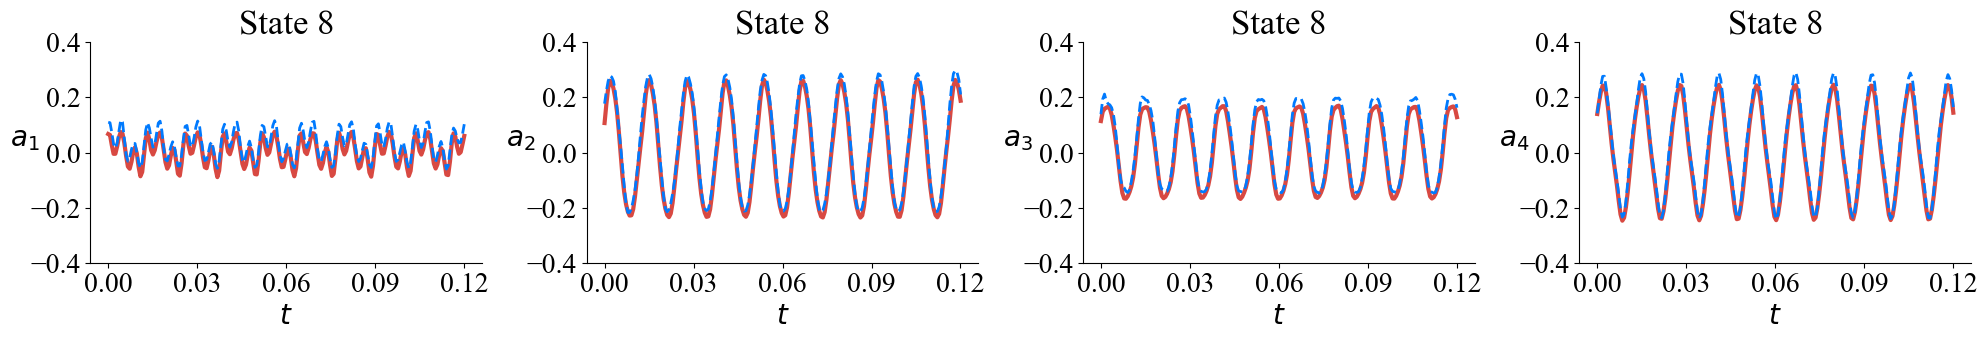

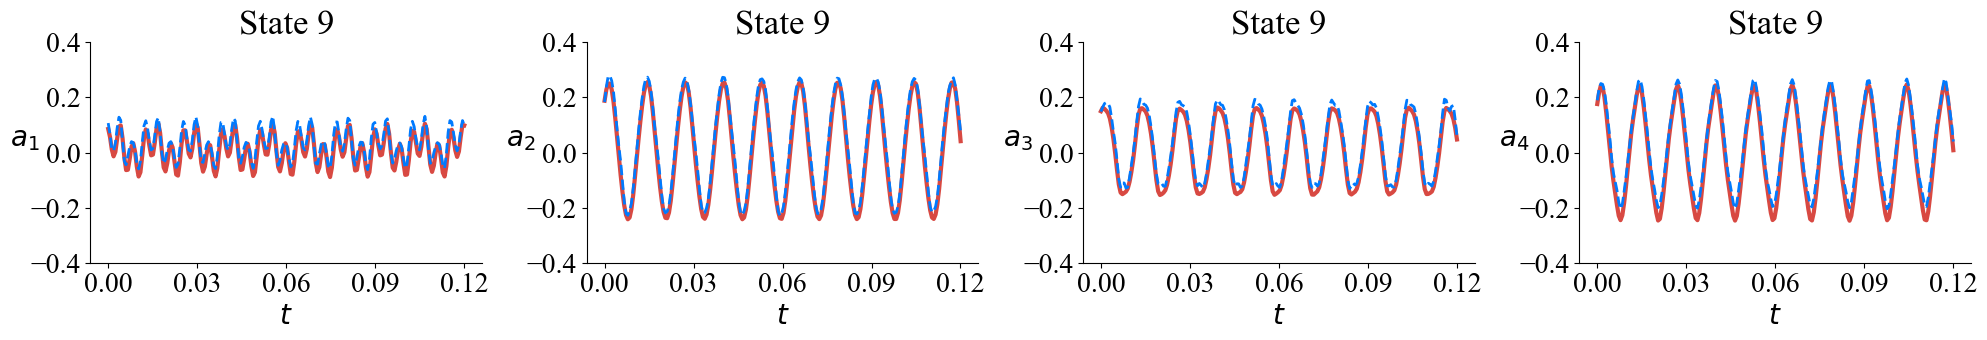

In [3]:
case =   ['1', '2', '3', '4', '7', '10', '5', '6', '8', '9']
idx = 15
# 7,17
for i in range(6):
    gt = test_y[100*i + idx, :]
    pred = test_data_pred[100*i + idx, :]
    visualize.plot_output_samples(case[i], gt, pred, save_as = os.path.join(evaluator.save_dir, './forward_case_{}.png'.format(case[i])), num_sensors = 4)
    
for i in range(6, 10):
    gt = test_y[100*i + idx, :]
    pred = test_data_pred[100*i + idx, :]
    visualize.plot_output_samples(case[i], gt, pred, save_as = os.path.join(evaluator.save_dir, './forward_case_{}.png'.format(case[i])), num_sensors = 4)